In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\vivek\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\vivek\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\vivek\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [16]:
data = pd.read_csv("../pl_stats.csv",index_col="Squad")

In [17]:
def_pressing_stats = ['Tkl','TklW','Def 3rd','Mid 3rd','Att 3rd','Tkl','Att','Tkl%','Lost','Blocks','Sh','Pass','Int','Tkl+Int','Clr','Err']

In [22]:
data_pressing = data.loc[:,def_pressing_stats]

In [19]:
shot_goal_creation_stats = ['SCA','SCA90','GCA','GCA90']

In [20]:
possession_stats = ['Poss','90s','Touches','Def Pen','Def 3rd','Mid 3rd','Att 3rd','Att Pen','Live','Att','Succ','Succ%','Tkld','Tkld%','Carries','TotDist','PrgDist','PrgC','1/3','CPA','Mis','Dis','Rec','PrgR']

In [23]:
data_possession = data.loc[:,possession_stats]

In [30]:
data_pressing.columns, data_possession.columns

(Index(['Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl', 'Att', 'Tkl%',
        'Lost', 'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err'],
       dtype='object'),
 Index(['Poss', '90s', 'Touches', 'Def Pen', 'Def 3rd', 'Mid 3rd', 'Att 3rd',
        'Att Pen', 'Live', 'Att', 'Succ', 'Succ%', 'Tkld', 'Tkld%', 'Carries',
        'TotDist', 'PrgDist', 'PrgC', '1/3', 'CPA', 'Mis', 'Dis', 'Rec',
        'PrgR'],
       dtype='object'))

In [41]:
data_pressing_possession = data_pressing.merge(data_possession)

In [42]:
data_pressing_possession.columns

Index(['Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl', 'Att', 'Tkl%',
       'Lost', 'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'Poss',
       '90s', 'Touches', 'Def Pen', 'Att Pen', 'Live', 'Succ', 'Succ%', 'Tkld',
       'Tkld%', 'Carries', 'TotDist', 'PrgDist', 'PrgC', '1/3', 'CPA', 'Mis',
       'Dis', 'Rec', 'PrgR'],
      dtype='object')

In [85]:
data_pressing_possession_corr = data_pressing_possession.corr()

<AxesSubplot:>

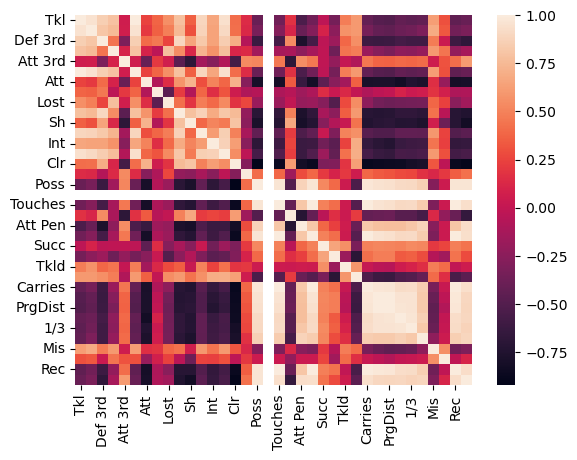

In [86]:
sns.heatmap(data_pressing_possession_corr)

In [87]:
data_pressing_possession_corr = data_pressing_possession_corr[abs(data_pressing_possession_corr)>0.65]

In [88]:
correlated_features = data_pressing_possession_corr.loc[def_pressing_stats,possession_stats]

<AxesSubplot:>

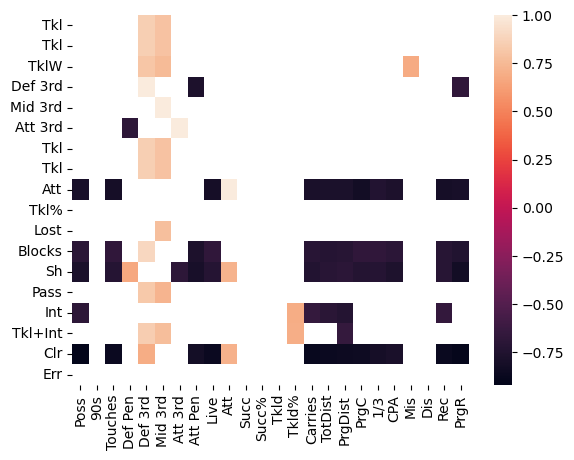

In [89]:
sns.heatmap(correlated_features)

In [90]:
correlated_features_df = correlated_features.stack().index
correlated_features_df=pd.DataFrame(correlated_features_df)

correlated_features_df

,0
0,"(Tkl, Def 3rd)"
1,"(Tkl, Mid 3rd)"
2,"(Tkl, Def 3rd)"
3,"(Tkl, Mid 3rd)"
4,"(TklW, Def 3rd)"
...,...
79,"(Clr, PrgC)"
80,"(Clr, 1/3)"
81,"(Clr, CPA)"
82,"(Clr, Rec)"


In [96]:
poss_press_stats=data_pressing_possession_corr.loc[['Def 3rd','Mid 3rd','Att 3rd','Tkl','Att','Tkl%','Lost','Blocks','Sh','Pass','Int','Tkl+Int','Clr','Err'],'Poss'].dropna().index

In [99]:
sns.lineplot(data_pressing_possession,x="Poss",y=poss_press_stats,hue=data_pressing_possession.index)

ValueError: All arrays must be of the same length